In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv('/content/rainfall_data(1).csv')
print(df)

         City  Temperature  Humidity  Wind_Speed  Cloud_Cover  Rainfall_mm
0      Mumbai           28        85          15           90          120
1       Delhi           35        45           8           30           15
2   Bangalore           24        70          12           65           65
3     Chennai           32        80          18           85           95
4     Kolkata           30        78          14           75           85
5   Hyderabad           31        65          10           55           45
6        Pune           26        75          13           70           75
7   Ahmedabad           36        40           7           25            8
8      Jaipur           38        35           6           20            5
9     Lucknow           34        55           9           40           25
10     Mumbai           29        88          16           92          125
11      Delhi           33        50           9           35           20
12  Bangalore           2

In [11]:
df.head()

,City,Temperature,Humidity,Wind_Speed,Cloud_Cover,Rainfall_mm
0,Mumbai,28,85,15,90,120
1,Delhi,35,45,8,30,15
2,Bangalore,24,70,12,65,65
3,Chennai,32,80,18,85,95
4,Kolkata,30,78,14,75,85


In [12]:
df.tail()

,City,Temperature,Humidity,Wind_Speed,Cloud_Cover,Rainfall_mm
15,Hyderabad,30,68,11,58,48
16,Pune,27,77,14,72,78
17,Ahmedabad,35,42,8,28,10
18,Jaipur,37,38,7,22,6
19,Lucknow,32,58,10,45,28


In [13]:
df.shape

(20, 6)

In [14]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Rainfall_mm
count,20.0000,20.000000,20.000000,20.000000,20.000000
mean,31.1000,64.150000,11.500000,57.050000,55.350000
std,3.9855,17.330457,3.590924,24.615945,39.401142
min,24.0000,35.000000,6.000000,20.000000,5.000000
25%,28.7500,48.750000,8.750000,33.750000,18.750000
50%,31.0000,69.000000,11.000000,61.500000,56.500000
75%,34.2500,78.500000,14.250000,75.750000,85.750000
max,38.0000,88.000000,18.000000,92.000000,125.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         20 non-null     object
 1   Temperature  20 non-null     int64 
 2   Humidity     20 non-null     int64 
 3   Wind_Speed   20 non-null     int64 
 4   Cloud_Cover  20 non-null     int64 
 5   Rainfall_mm  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [17]:
df.isnull().sum()

,0
City,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Rainfall_mm,0


In [19]:
correlation = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Rainfall_mm']].corr()
display(correlation['Rainfall_mm'].sort_values(ascending=False))

,Rainfall_mm
Rainfall_mm,1.000000
Cloud_Cover,0.986522
Humidity,0.969246
Wind_Speed,0.945413
Temperature,-0.714130


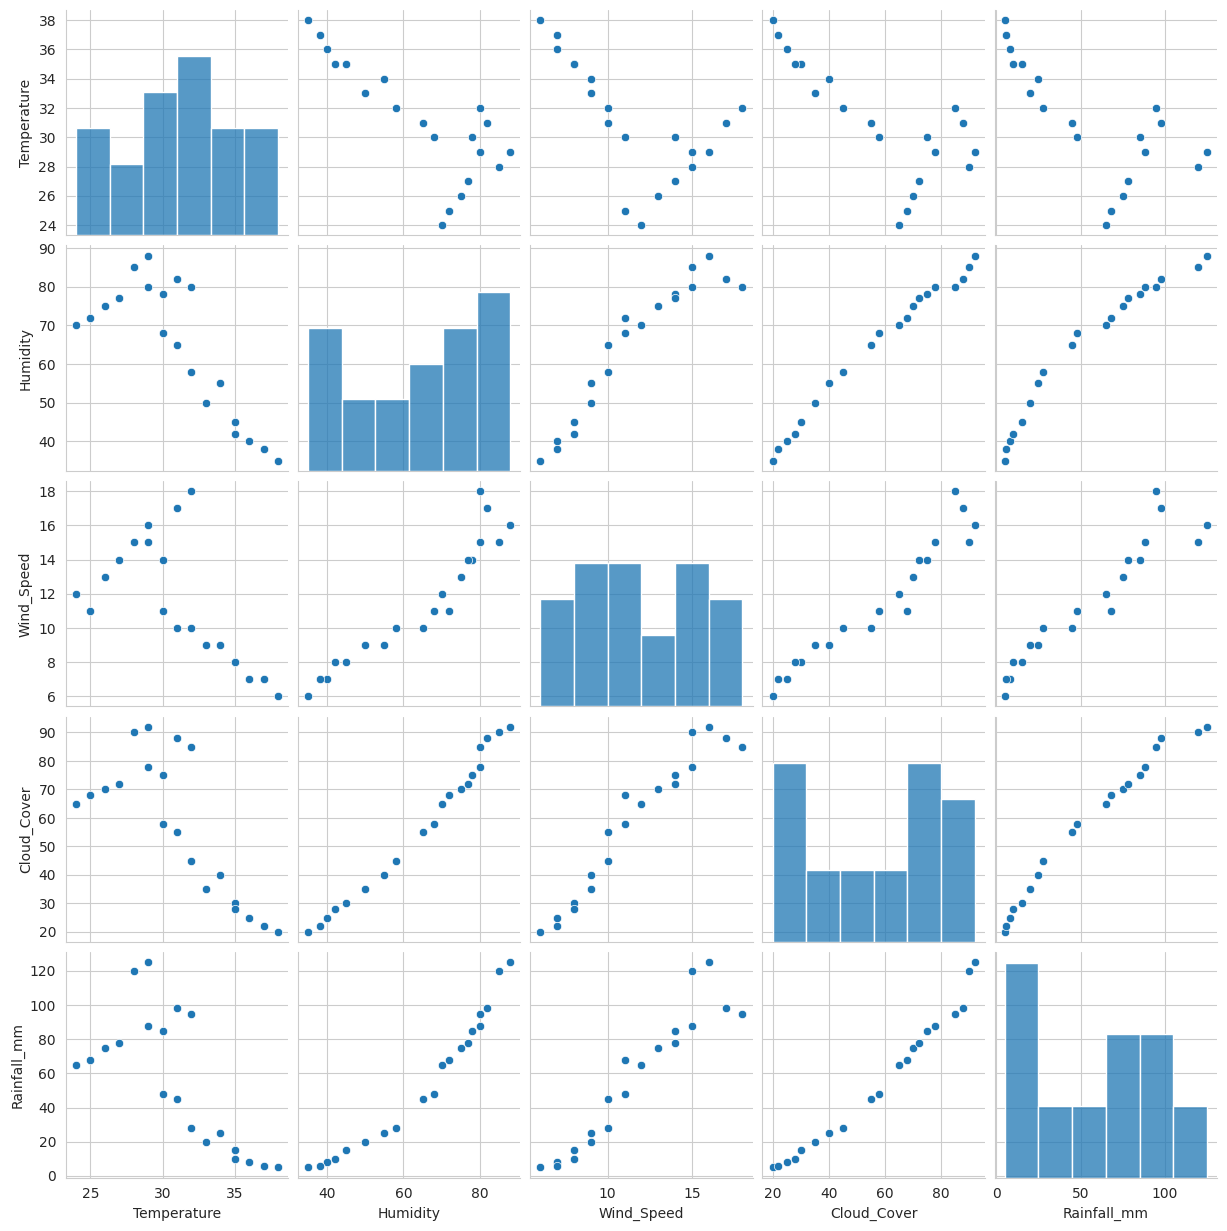

In [20]:
sns.set_style('whitegrid')
sns.pairplot(df)

Text(0.5, 1.0, 'City wise Rainfall')

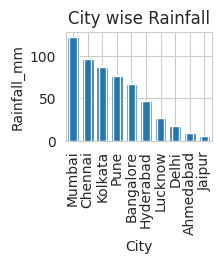

In [22]:
plt.subplot(3, 3, 1)
City_rainfall = df.groupby('City')['Rainfall_mm'].mean().sort_values(ascending=False)
sns.barplot(x = City_rainfall.index, y = City_rainfall)
City_rainfall.plot(kind='bar')
plt.title('City wise Rainfall')

In [23]:
x = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover']]
y = df['Rainfall_mm']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [34]:
print(x_train.shape)
print(x_test.shape)

(14, 4)
(6, 4)


In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)

In [37]:
result = pd.DataFrame({
    'Actual_Rainfall(mm)': y_test.values,
    'Predicted_Rainfall(mm)': y_pred,
    'Difference(mm)': y_test.values - y_pred
})

In [38]:
print(result)

   Actual_Rainfall(mm)  Predicted_Rainfall(mm)  Difference(mm)
0                  120              113.162556        6.837444
1                   10                8.260467        1.739533
2                   48               57.977852       -9.977852
3                   15               12.599513        2.400487
4                    5                1.398208        3.601792
5                   45               56.184855      -11.184855


In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [57]:
new = pd.DataFrame({
    'Temperature': [35],
    'Humidity': [84],
    'Wind_Speed': [16],
    'Cloud_Cover': [45]
})
display(new)

,Temperature,Humidity,Wind_Speed,Cloud_Cover
0,35,84,16,45


In [58]:
new_record = model.predict(new)
print(new_record)

[14.84386323]
